<a href="https://colab.research.google.com/github/vanhoanglong213/Tensorflow_187/blob/master/image_classification_with_CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install -U tensorflow_datasets

     |████████████████████████████████| 686kB 6.4MB/s 


In [4]:
from __future__ import absolute_import, division, print_function

#import tensorflow and tensorflow datasest

import tensorflow as tf
import tensorflow_datasets as tfds
tf.logging.set_verbosity(tf.logging.ERROR)

#helper libraries
import math
import numpy as np
import matplotlib.pyplot as plt

#improve progress bar display
import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm

print(tf.__version__)

#this will go away in the future
#if this gives an errro, you might be running tensor 2 or above
#if so, just comment this line and run this cell again
tf.enable_eager_execution()

1.14.0


Loading the dataset returns metadata as well as a training dataset and test dataset.

The model is trained using train_dataset.
The model is tested against test_dataset.

In [5]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised = True, with_info = True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/1.0.0. Subsequent calls will reuse this data.


In [0]:
class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

Explore the data

In [8]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples

print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples: {}".format(num_test_examples))

Number of training examples: 60000
Number of test examples: 10000


Preprocess the data

In [0]:
def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /=255
  return(images, labels)

In [0]:
train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

Explore the preprocess data


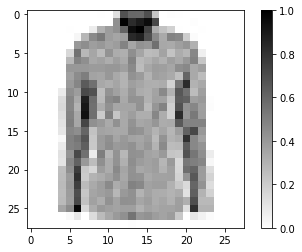

In [11]:
#take a single image, remove the color dimension by reshaping
for image, label in test_dataset.take(1):
  break
  
image = image.numpy().reshape((28,28))
#plot the image - voila a piece of fashion clothing

#plt.figure()
plt.imshow(image, cmap = plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

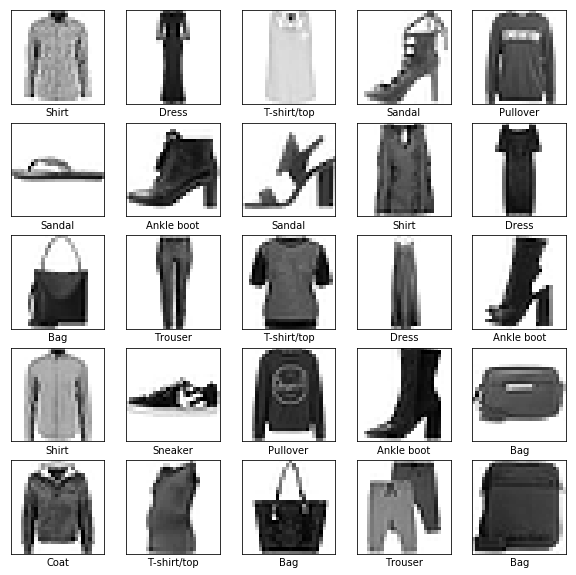

In [12]:
plt.figure(figsize = (10,10))
i = 0

for(image, lable) in test_dataset.take(25):
  image = image.numpy().reshape((28,28))
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image, cmap = plt.cm.binary)
  plt.xlabel(class_name[lable])
  i+=1
  
plt.show()

Build the model

- setup the layer

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding = 'same', activation = tf.nn.relu, input_shape = (28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2), strides = 2),
    tf.keras.layers.Conv2D(64, (3,3), padding = 'same', activation = tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2,2), strides = 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)    
])

This network layers are:

"convolutions" tf.keras.layers.Conv2D and MaxPooling2D— Network start with two pairs of Conv/MaxPool. The first layer is a Conv2D filters (3,3) being applied to the input image, retaining the original image size by using padding, and creating 32 output (convoluted) images (so this layer creates 32 convoluted images of the same size as input). After that, the 32 outputs are reduced in size using a MaxPooling2D (2,2) with a stride of 2. The next Conv2D also has a (3,3) kernel, takes the 32 images as input and creates 64 outputs which are again reduced in size by a MaxPooling2D layer. So far in the course, we have described what a Convolution does, but we haven't yet covered how you chain multiples of these together. We will get back to this in lesson 4 when we use color images. At this point, it's enough if you understand the kind of operation a convolutional filter performs

output tf.keras.layers.Dense — A 128-neuron, followed by 10-node softmax layer. Each node represents a class of clothing. As in the previous layer, the final layer takes input from the 128 nodes in the layer before it, and outputs a value in the range [0, 1], representing the probability that the image belongs to that class. The sum of all 10 node values is 1.

In [0]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']                
             )

In [0]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [16]:
model.fit(train_dataset, epochs = 10, steps_per_epoch = math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.3952 - acc: 0.8577
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2579 - acc: 0.9065
Epoch 3/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2098 - acc: 0.9240
Epoch 4/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1799 - acc: 0.9340
Epoch 5/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.1513 - acc: 0.9446
Epoch 6/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.1295 - acc: 0.9515
Epoch 7/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.1093 - acc: 0.9597
Epoch 8/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0940 - acc: 0.9657
Epoch 9/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0737 - acc: 0.9732
Epoch 10/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0641 - acc: 0.9760


In [17]:
test_loss, test_accuracy = model.evaluate(test_dataset, steps = math.ceil(num_test_examples /32))
print('accuracy on this test: ', test_accuracy )

313/313 [==============================] - 3s 9ms/step - loss: 0.3173 - acc: 0.9177
accuracy on this test:  0.9177


make a prediction and explore


In [0]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [40]:
predictions.shape

(32, 10)

In [41]:
predictions[0]

array([1.6094755e-05, 5.5769417e-10, 1.1702836e-03, 2.4149173e-07,
       9.7178090e-03, 2.9818132e-08, 9.8909515e-01, 4.5624283e-08,
       8.3596791e-10, 4.1096294e-07], dtype=float32)

In [42]:
np.argmax(predictions[0])

6

In [43]:
test_labels[0]

6

In [0]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_name[predicted_label],
                                100*np.max(predictions_array),
                                class_name[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


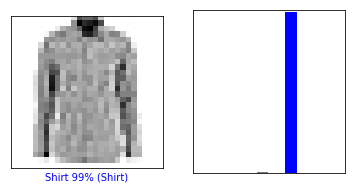

In [93]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

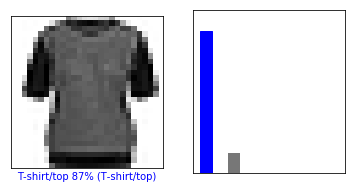

In [94]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

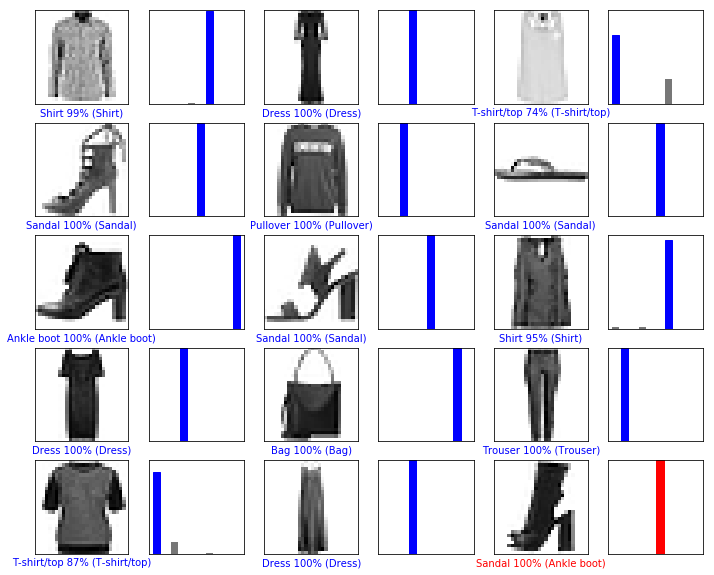

In [95]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize = (2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

#grab an image form the test dataset


In [96]:
img = test_images[0]

print(img.shape)

(28, 28, 1)


In [87]:
#add the image to a batch where it's the only member
img = np.array([img])
print(img.shape)

(1, 28, 28, 1)


In [88]:
predictions_single = model.predict(img)
print(predictions_single)


[[1.6094738e-05 5.5769211e-10 1.1702826e-03 2.4149173e-07 9.7178137e-03
  2.9818246e-08 9.8909515e-01 4.5624112e-08 8.3596952e-10 4.1096371e-07]]


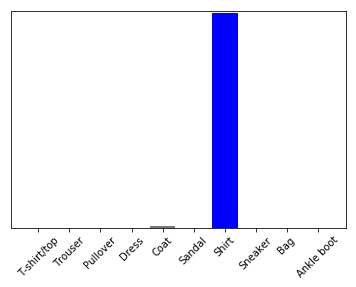

In [98]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_name, rotation = 45)

In [99]:
np.argmax(predictions_single[0])

6